In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Newton's Method to find minima of unconstrained optimization problem

In [2]:
def newtonMethodMultiDim(objective,
                         gradient,
                         hessian,
                         x0,
                         tolerance,
                         minima=True,
                         max_iterations=10000):
  norm_gradients = []
  function_values = []
  delta_xs = []
  condition_numbers = []
  x = x0
  i = 0
  while(np.linalg.norm(gradient(x)) > tolerance and i < max_iterations):
    h = hessian(x)
    g = gradient(x)
    cond_h = np.linalg.cond(h)
    del_x = np.linalg.solve(h,g)
    x -= del_x
    norm_gradients.append(np.linalg.norm(g))
    function_values.append(objective(x))
    delta_xs.append(np.linalg.norm(del_x))
    condition_numbers.append(cond_h)
    i += 1

  return x, objective(x), norm_gradients, function_values, delta_xs, condition_numbers

#Plots for 1st function


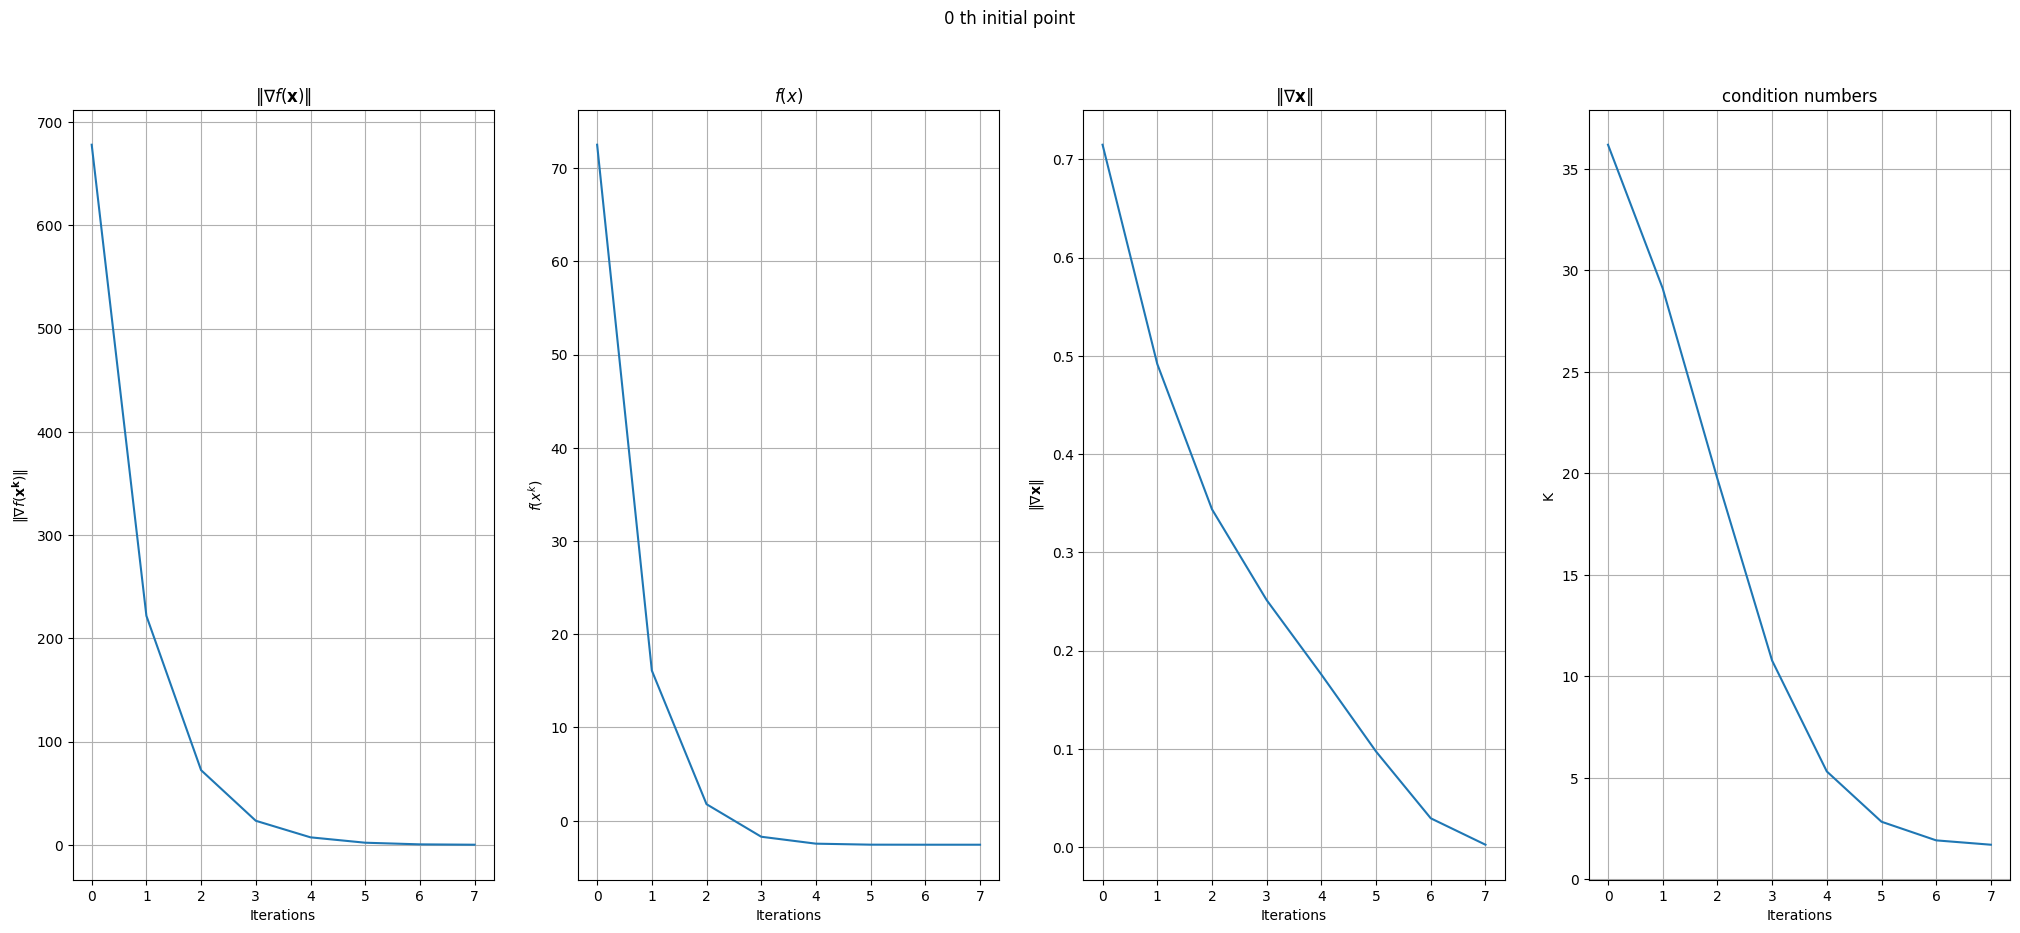

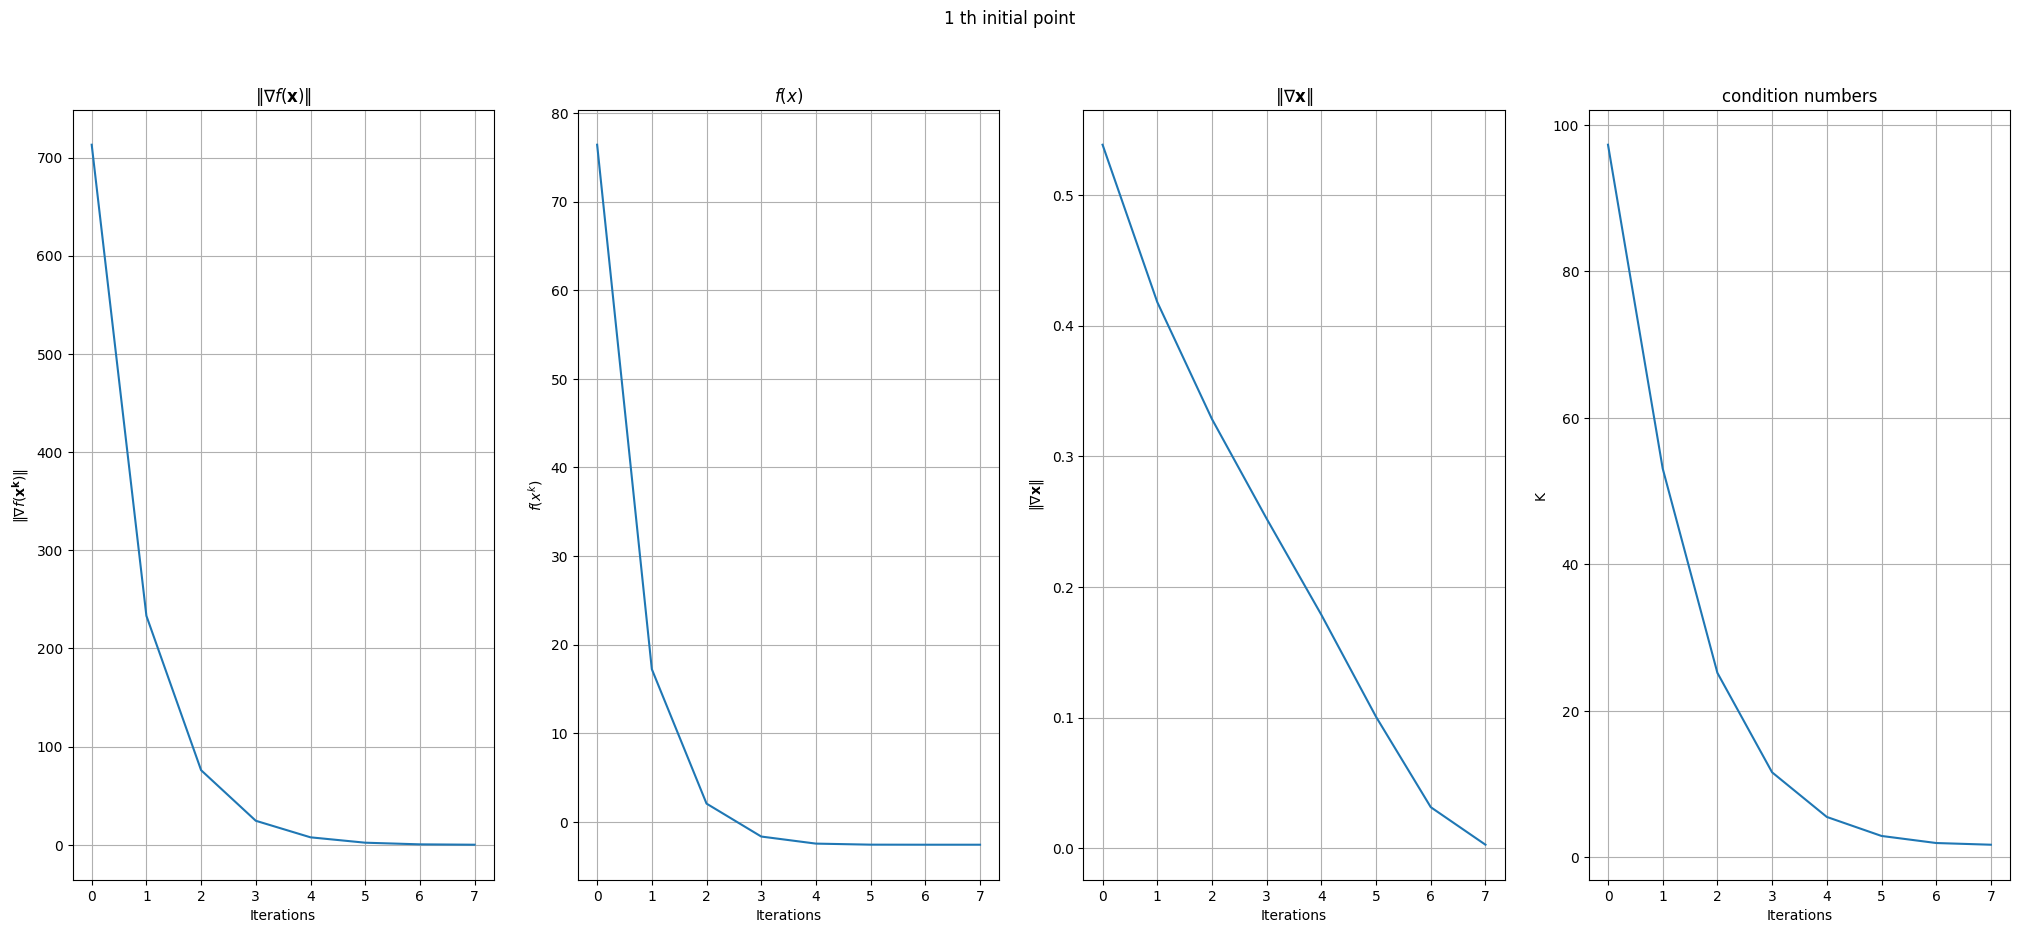

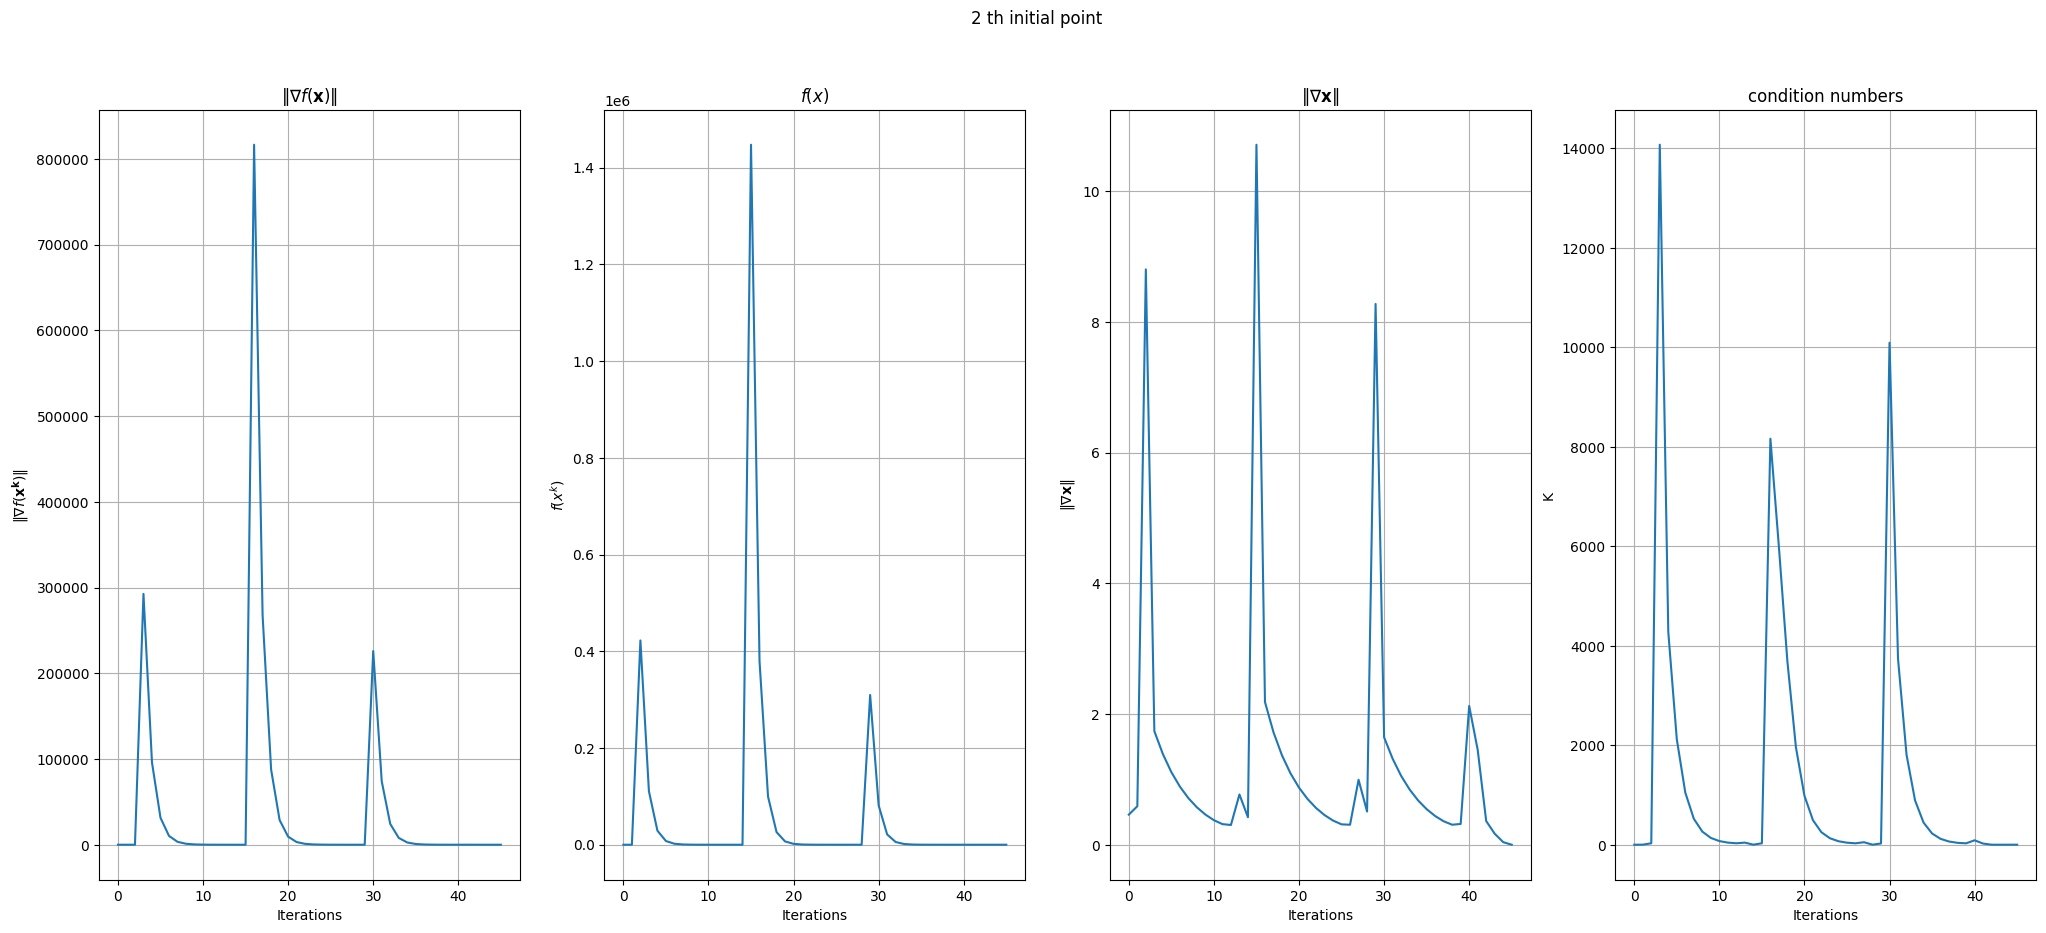

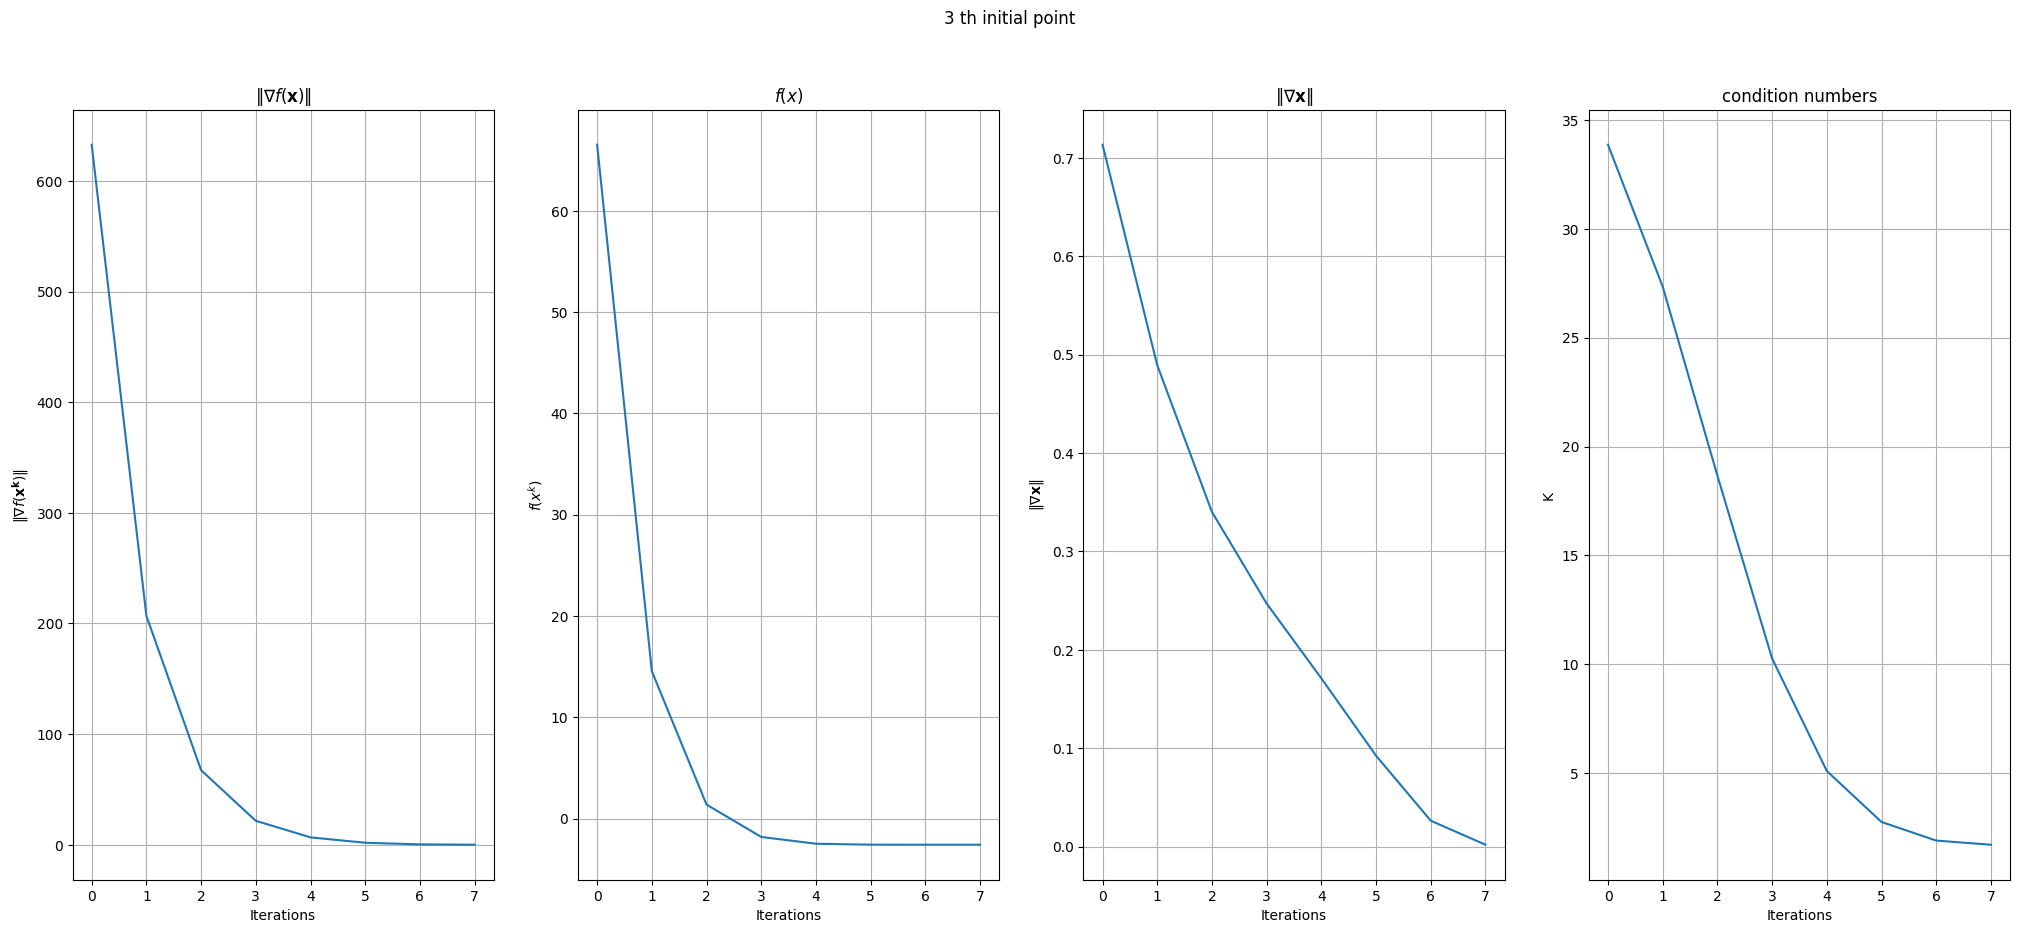

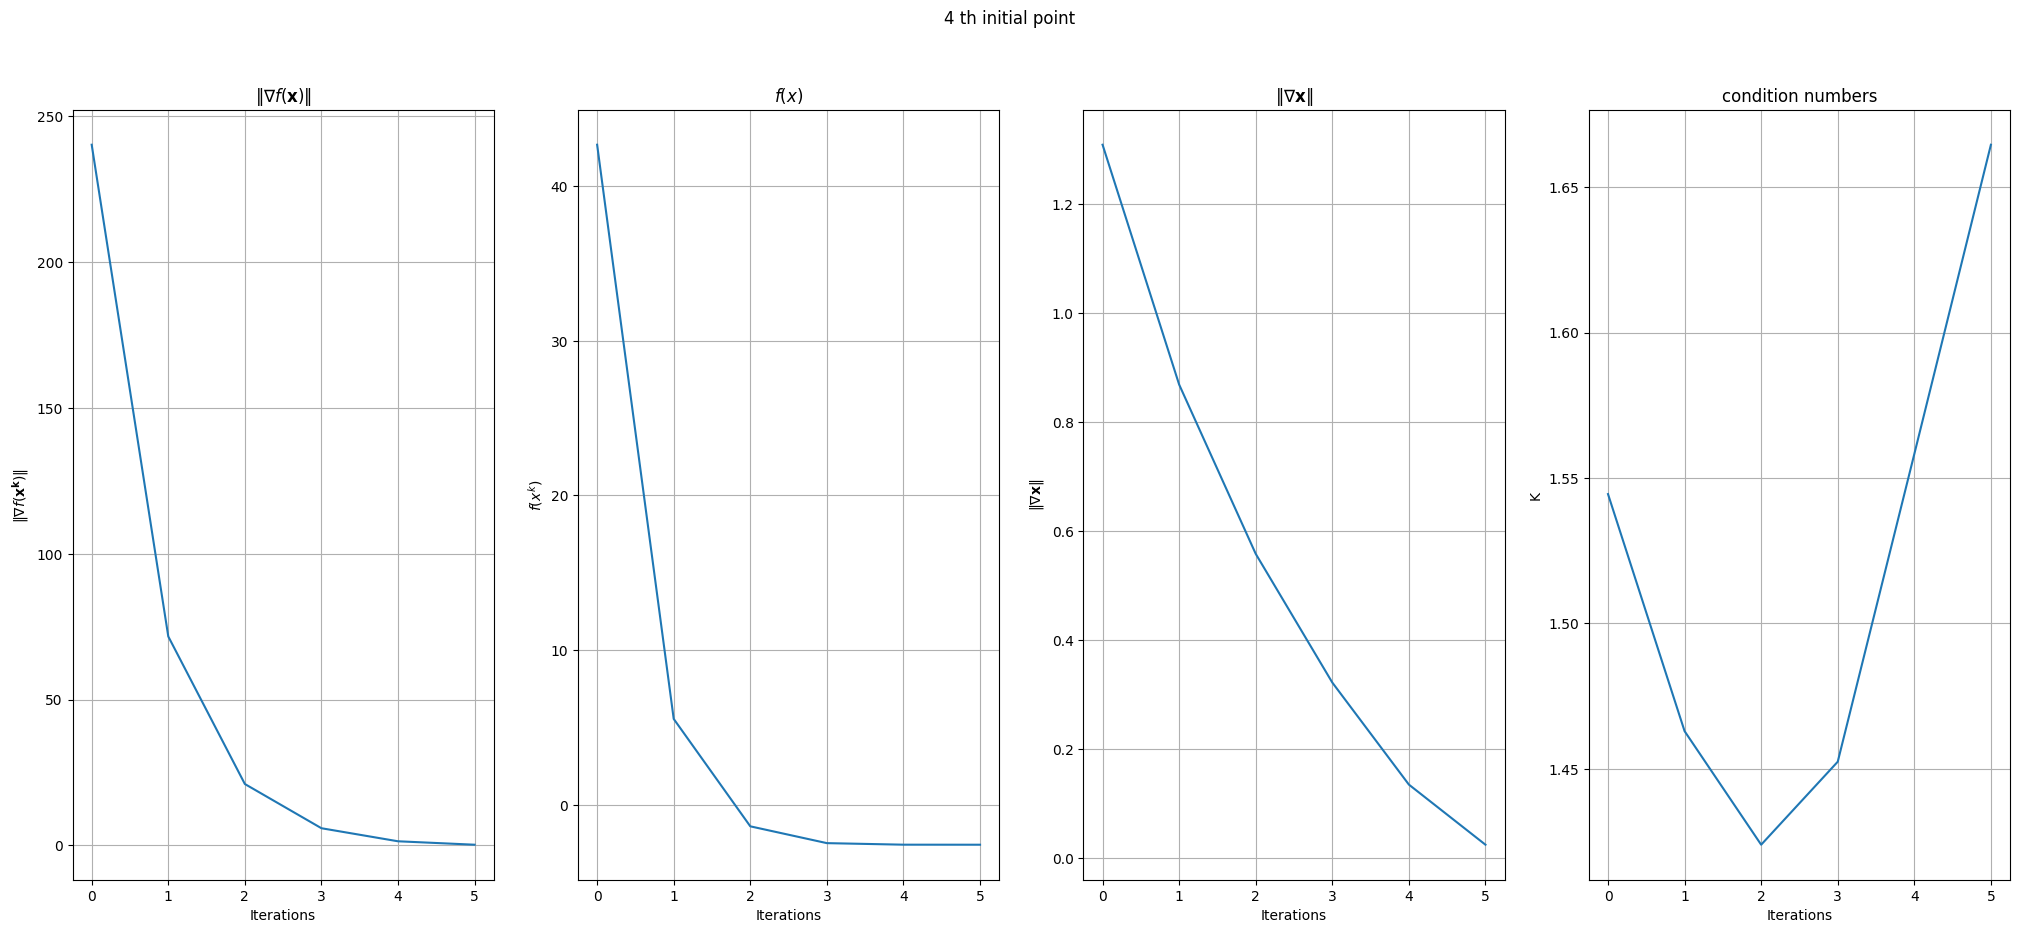

In [15]:
# f: R^2 -> R
# f has 1 minima
def func1(x):
  return (x[0] - 1)**4 + (x[1] - 1)**6 - x[0]*x[1]

#gradient of the function
def gradient1(x):
  return np.array([4*(x[0] - 1)**3 - x[1], 6*(x[1] - 1)**5 - x[0]])

#Hessian matrix
def hessian1(x):
  return np.array([np.array([12*(x[0] - 1)**2, -1]),np.array([-1,30*(x[1] - 1)**4]) ])

#tolerance
tolerance = 0.01

# Plottings for 5 different initial points generated at random
for i in range(5):
  np.random.seed(i)
  x0 = 5*np.random.rand(2)
  optima, optimum, norm_gradients, function_values,delta_xs,condition_numbers = newtonMethodMultiDim(func1, gradient1, hessian1, x0,tolerance)
  iterations = np.arange(0, len(norm_gradients))
  y = np.array2string(x0, formatter={'float_kind': lambda x: f"{x:.2f}"})
  fig, axes = plt.subplots(1, 4, figsize = (25,10))
  fig.suptitle(f"{i} th initial point")

  axes[0].plot(iterations, norm_gradients)
  axes[0].set_title(r"$\| \nabla f(\mathbf{x}) \|$")
  axes[0].set_xlabel("Iterations")
  axes[0].set_ylabel(r"$\| \nabla f(\mathbf{x^k}) \|$")
  axes[0].grid(True)

  axes[1].plot(iterations, function_values)
  axes[1].set_title(r"$f(x)$")
  axes[1].set_xlabel("Iterations")
  axes[1].set_ylabel(r"$f(x^k)$")
  axes[1].grid(True)

  axes[2].plot(iterations, delta_xs)
  axes[2].set_title(r"$\| \nabla \mathbf{x} \|$")
  axes[2].set_xlabel("Iterations")
  axes[2].set_ylabel(r"$\| \nabla \mathbf{x} \|$")
  axes[2].grid(True)

  axes[3].plot(iterations, condition_numbers)
  axes[3].set_title("condition numbers")
  axes[3].set_xlabel("Iterations")
  axes[3].set_ylabel("K")
  axes[3].grid(True)

  plt.show()

Observations: <br>
1) The function value decreases rapidly as the iterations grows.<br>
2) The gradient values also decreases rapidly with the growing iterations.Both of them implies that the algorithmm converges to give a point of minima.<br>
3) The number of iterations to converge depends on the initial point we take

#Plots for 2nd function

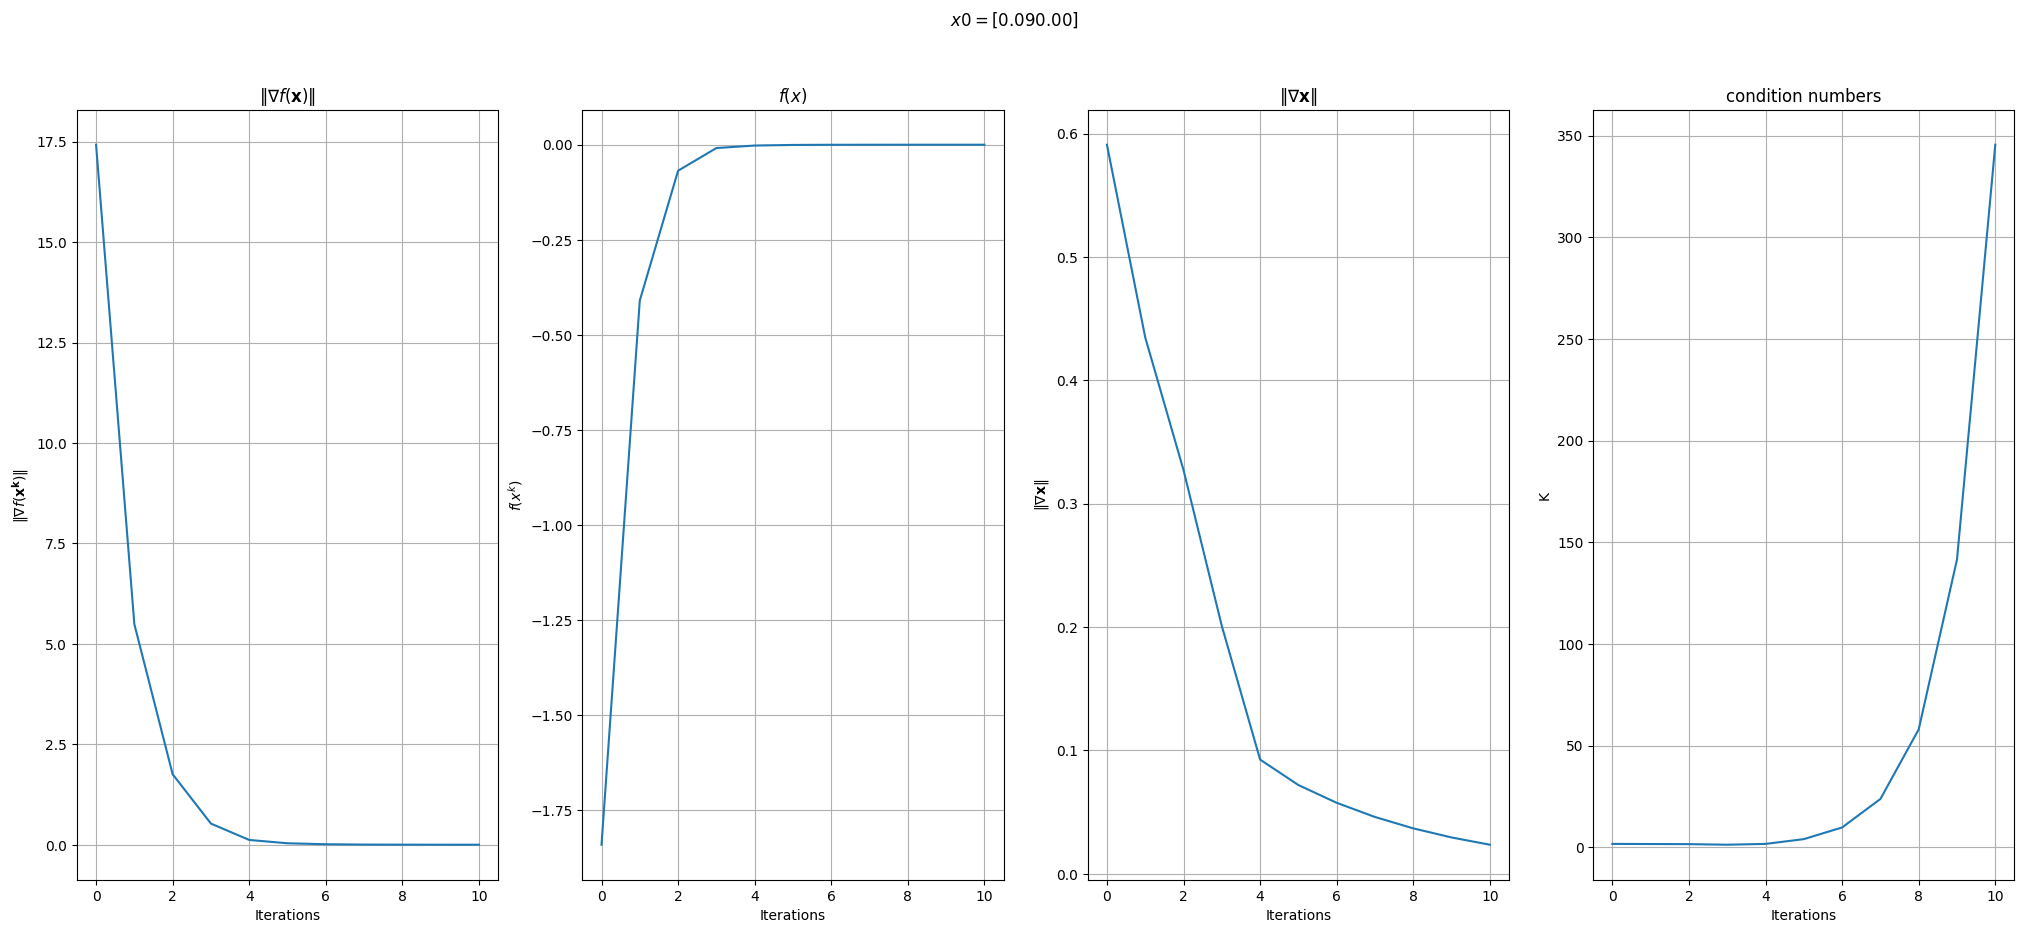

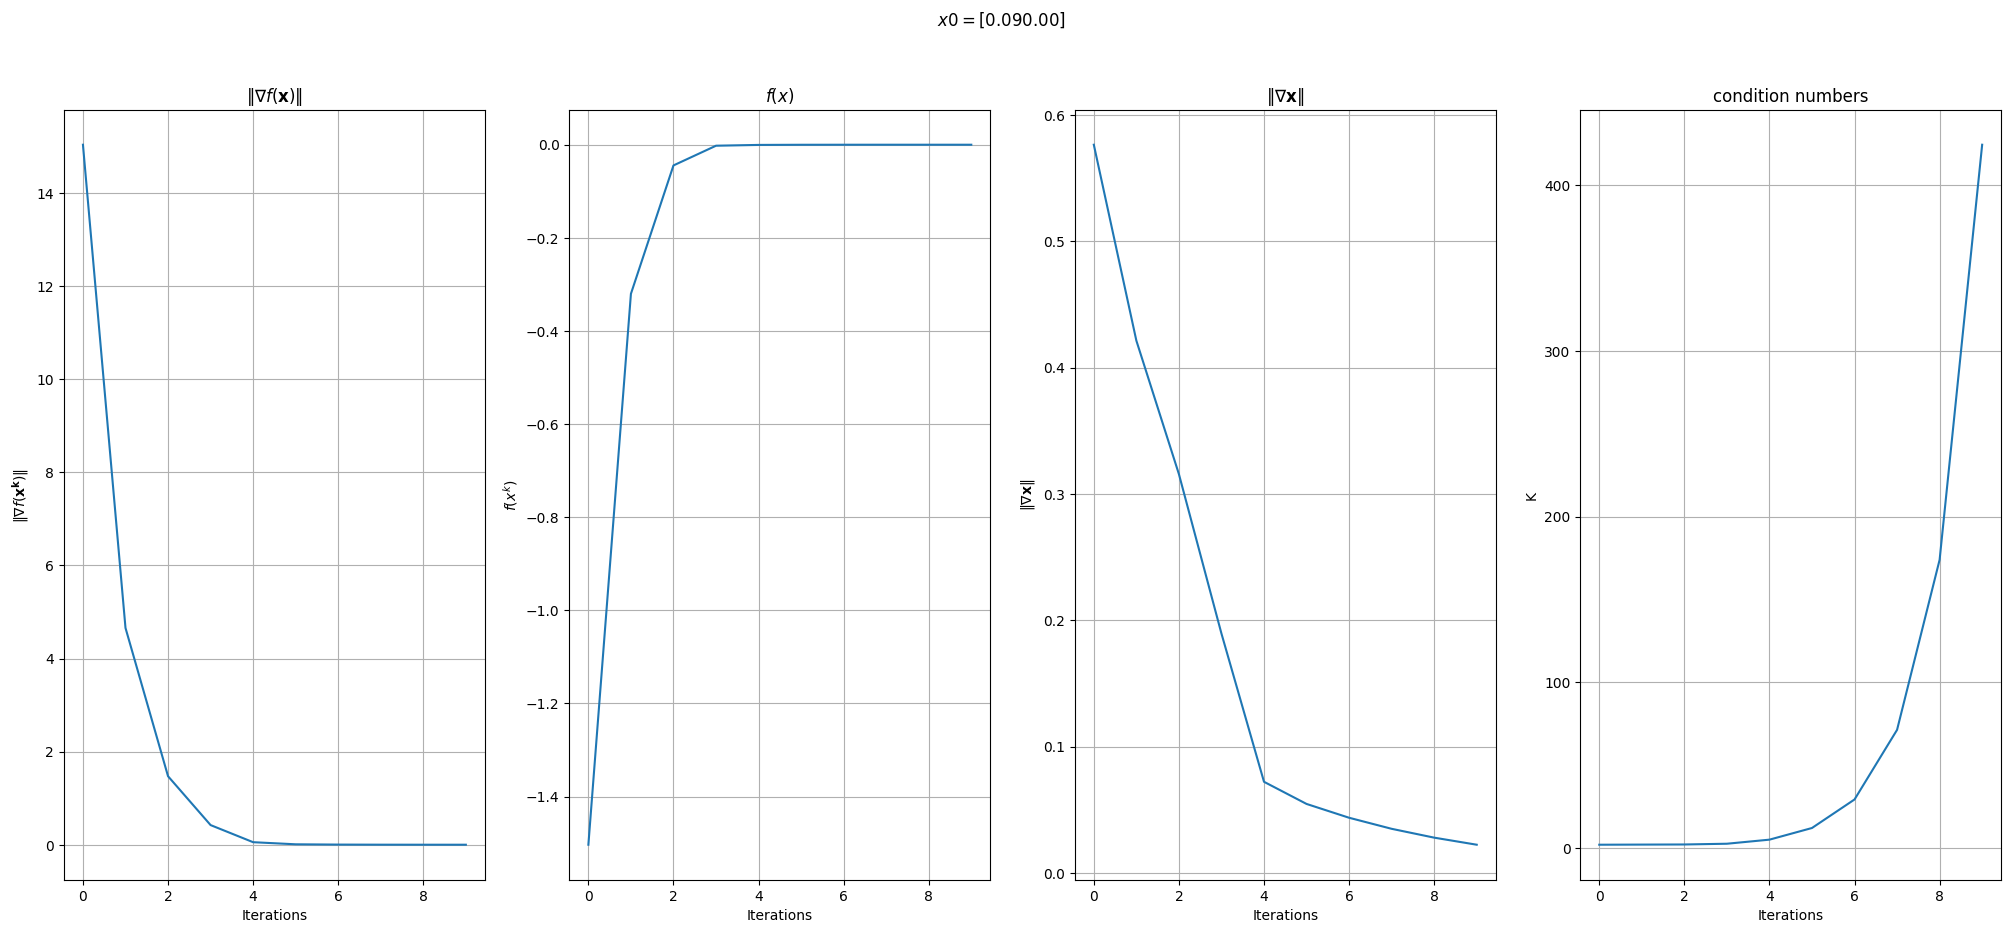

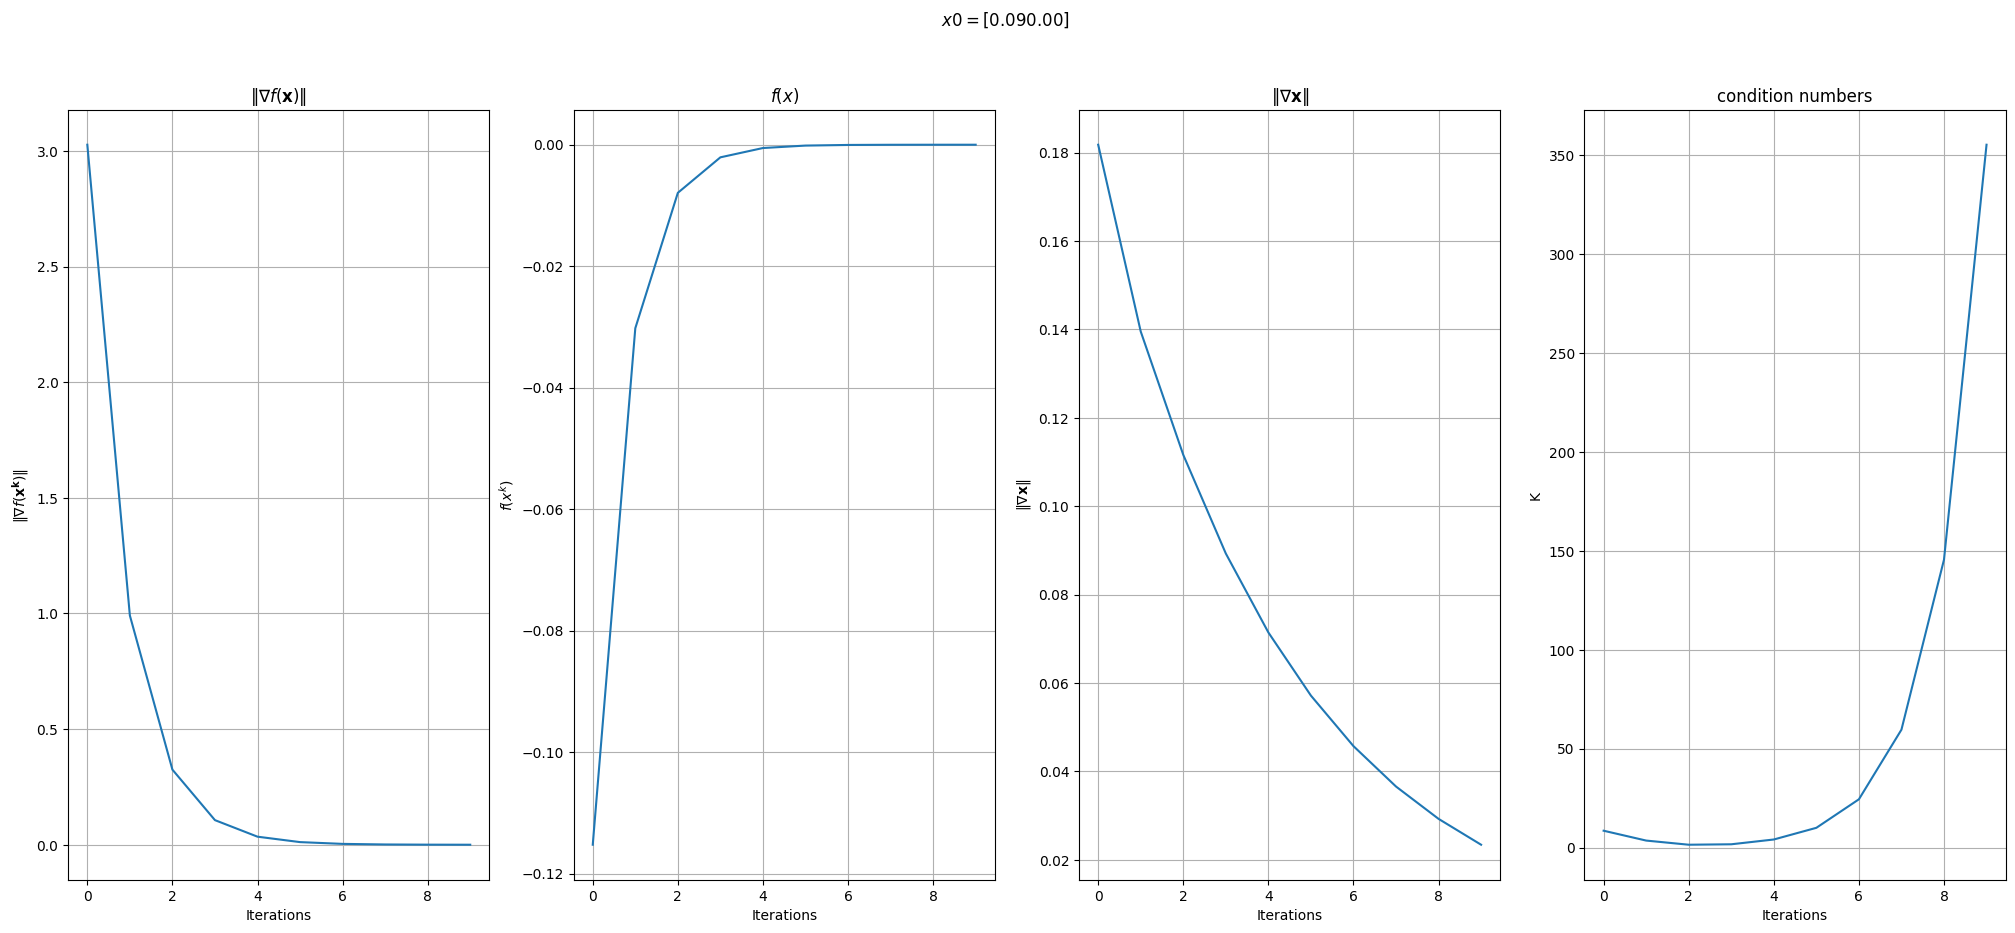

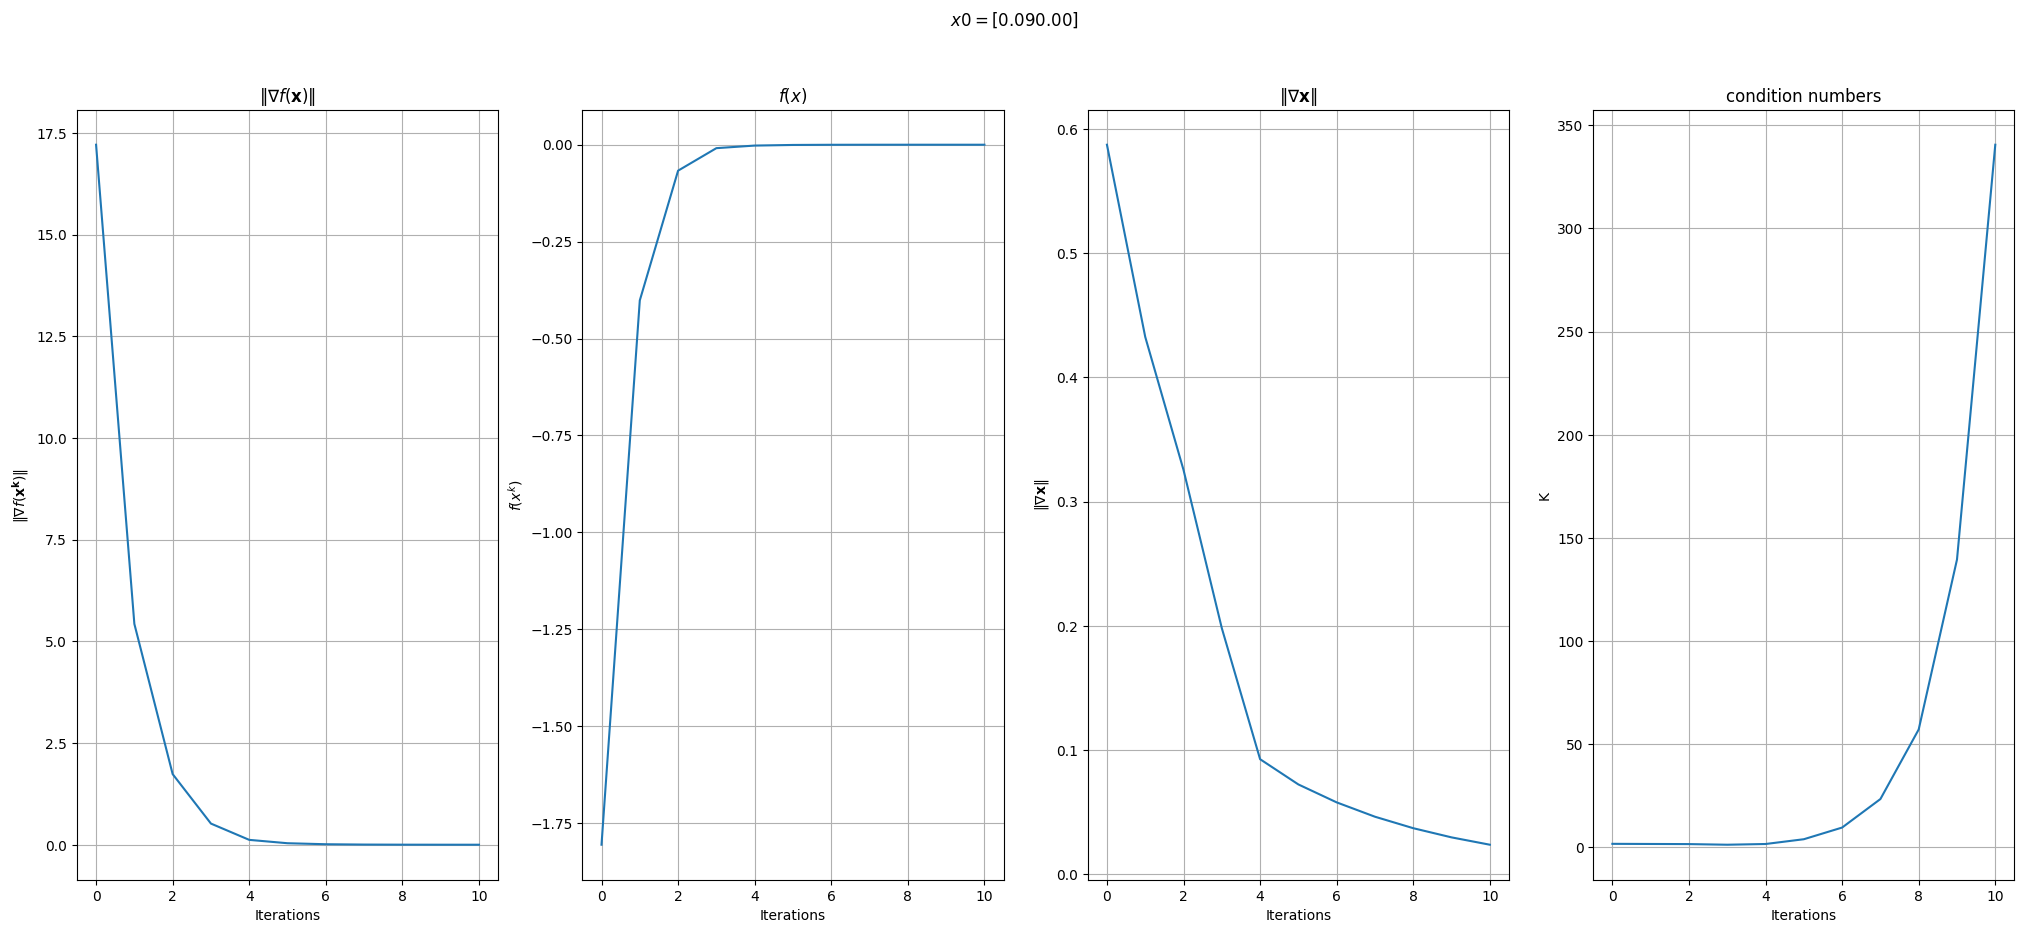

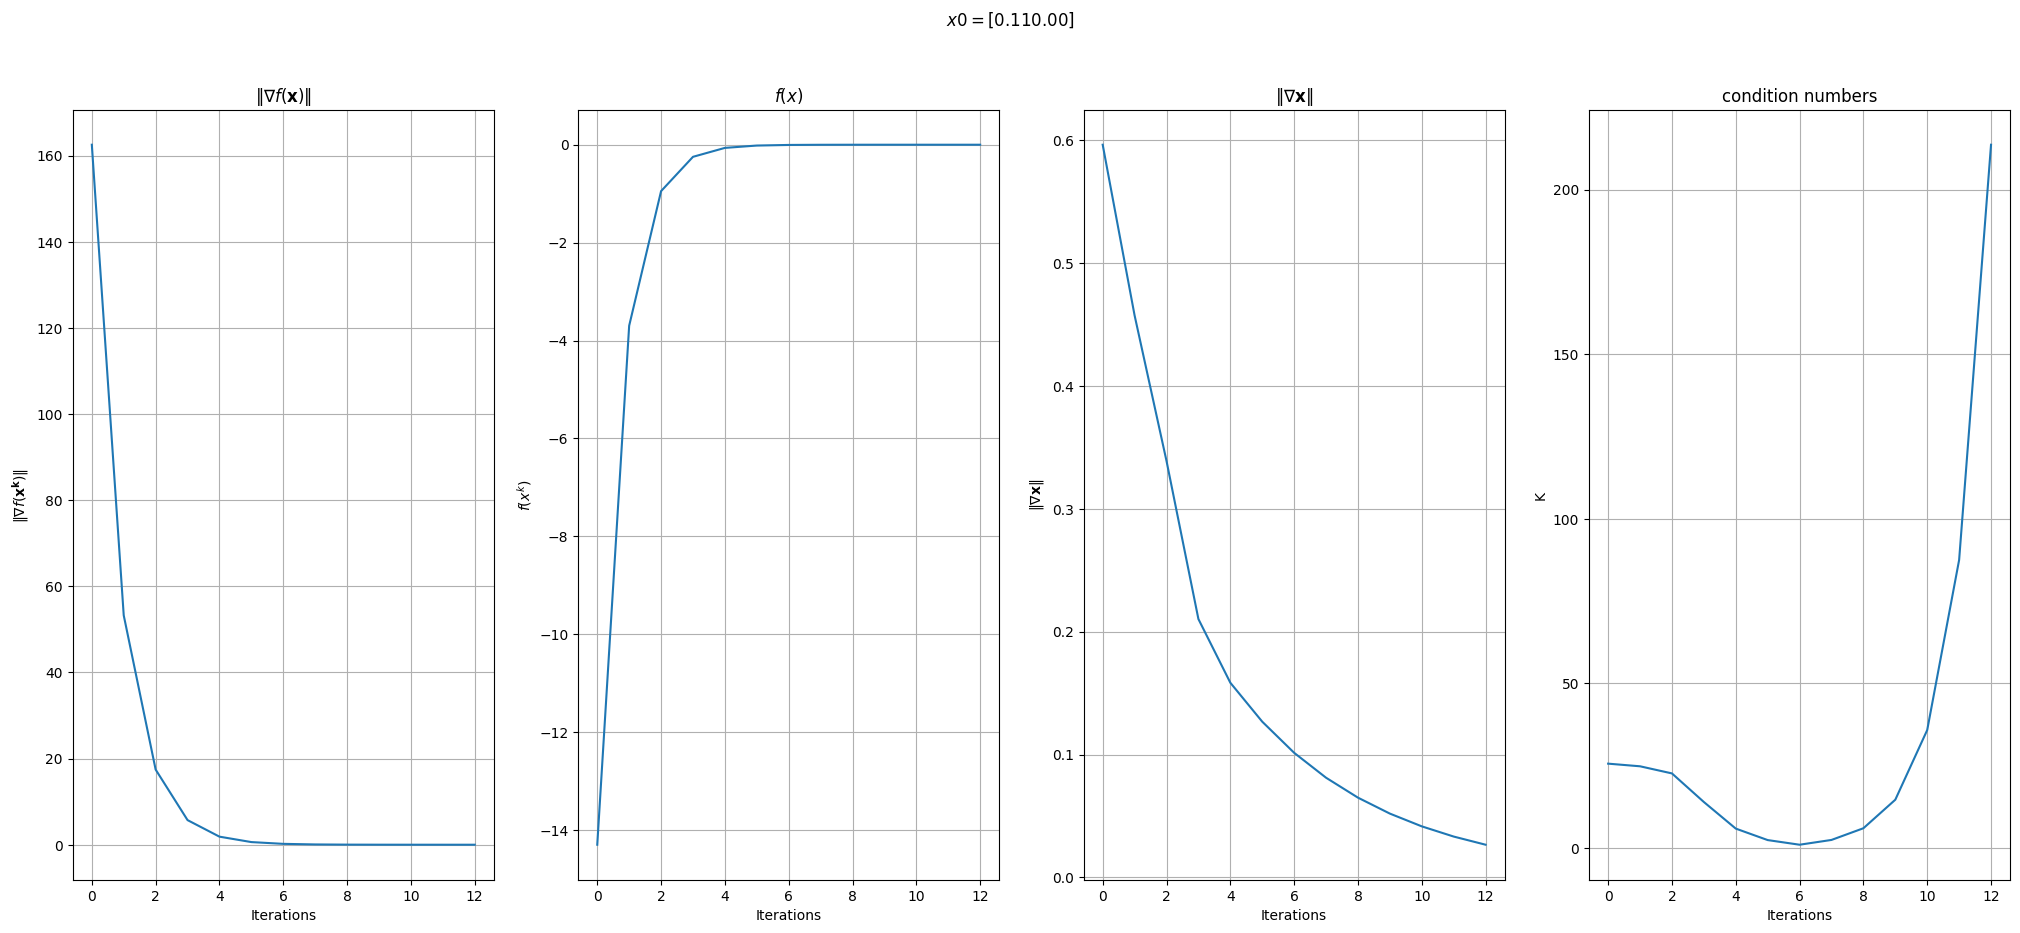

In [14]:
# f: R^2 -> R
# f has 1 maxima
def func2(x):
  return -x[0]**6 - x[1]**4 - x[1]**2

#gradient of the function
def gradient2(x):
  return np.array([-6*x[0]**5, -4*x[1]**3 - 2*x[1]])

#Hessian matrix
def hessian2(x):
  return np.array([np.array([-30*x[0]**4, 0]), np.array([0, -12*x[1]**2 - 2])])

#tolerance
tolerance = 0.0001

# Plottings for 5 different initial points taken at random
for i in range(5):
  np.random.seed(i)
  x0 = 2*np.random.rand(2)
  optima, optimum, norm_gradients, function_values,delta_xs,condition_numbers = newtonMethodMultiDim(func2, gradient2, hessian2, x0,tolerance)
  iterations = np.arange(0, len(norm_gradients))
  y = np.array2string(x0, formatter={'float_kind': lambda x: f"{x:.2f}"})
  fig, axes = plt.subplots(1, 4, figsize = (25,10))
  fig.suptitle(f"$x0 = {y}$")

  axes[0].plot(iterations, norm_gradients)
  axes[0].set_title(r"$\| \nabla f(\mathbf{x}) \|$")
  axes[0].set_xlabel("Iterations")
  axes[0].set_ylabel(r"$\| \nabla f(\mathbf{x^k}) \|$")
  axes[0].grid(True)

  axes[1].plot(iterations, function_values)
  axes[1].set_title(r"$f(x)$")
  axes[1].set_xlabel("Iterations")
  axes[1].set_ylabel(r"$f(x^k)$")
  axes[1].grid(True)

  axes[2].plot(iterations, delta_xs)
  axes[2].set_title(r"$\| \nabla \mathbf{x} \|$")
  axes[2].set_xlabel("Iterations")
  axes[2].set_ylabel(r"$\| \nabla \mathbf{x} \|$")
  axes[2].grid(True)

  axes[3].plot(iterations, condition_numbers)
  axes[3].set_title("condition numbers")
  axes[3].set_xlabel("Iterations")
  axes[3].set_ylabel("K")
  axes[3].grid(True)

  plt.show()

Observations:<br>
1)The function value grows as the number of iterations increases. It behaves as expected.

2) The gradient decreases as iterations grows and the algorithm converges to give the point of maxima. <br>

3) Same is true for this case. The number of iterations taken by the algorithm to converge depends on the initial point chosen